In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv('/content/ford.csv')

In [43]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [44]:
df.shape

(17966, 9)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [46]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


<Axes: ylabel='price'>

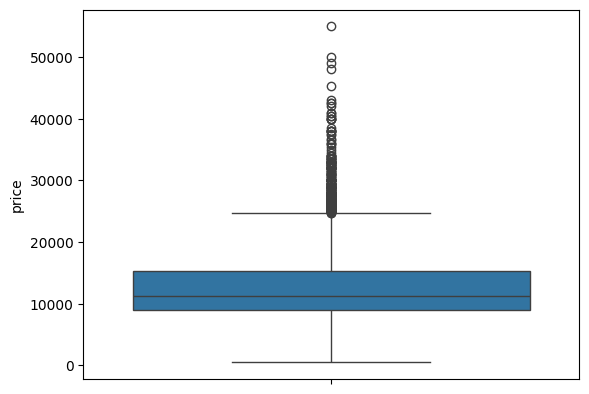

In [47]:
sns.boxplot(df['price'])

In [54]:
X=df.drop('price',axis=1)
Y=df['price']

In [55]:
X.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0


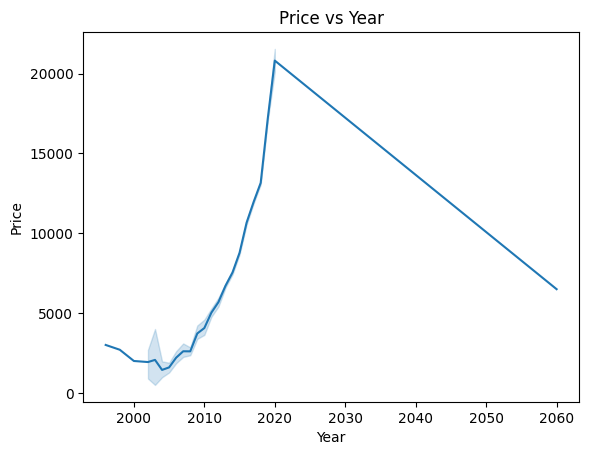

In [14]:
sns.lineplot(x='year', y='price', data=df)
plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

<Axes: >

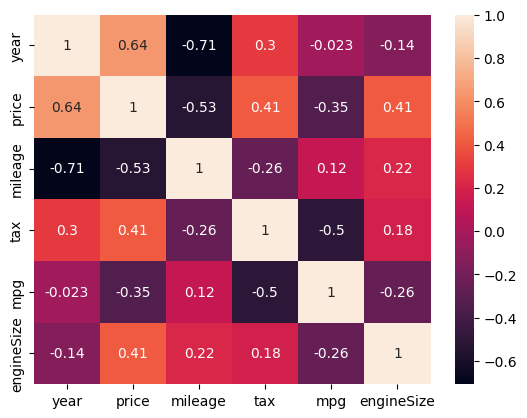

In [16]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

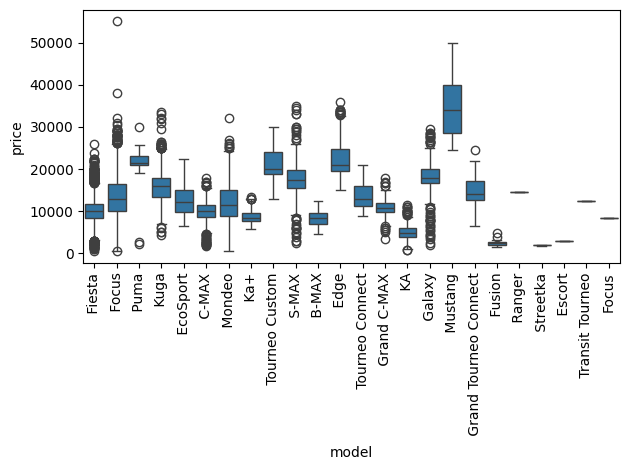

In [27]:
sns.boxplot(data=df,x='model',y='price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [57]:
X_one_hot = pd.get_dummies(X, columns=['model', 'transmission', 'fuelType'], drop_first=True)
display(X_one_hot.head())

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2018,9083,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,12456,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,10460,145,40.3,1.5,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,2019,1482,145,48.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [58]:
X_one_hot=X_one_hot.astype('int')

In [59]:
X.shape

(17966, 8)

In [66]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns from the original DataFrame structure
categorical_cols = ['model', 'transmission', 'fuelType']

# Create a new DataFrame X_label to store the label encoded columns
X_label = X

# Apply Label Encoding to each categorical column in X and add to X_label
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X_label[col] = label_encoders[col].fit_transform(X[col])

display(X_label.head())

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0


In [67]:
from sklearn.preprocessing import StandardScaler

scaler_one_hot = StandardScaler()
X_one_hot_scaled = scaler_one_hot.fit_transform(X_one_hot)
X_one_hot_scaled = pd.DataFrame(X_one_hot_scaled, columns=X_one_hot.columns)
display(X_one_hot_scaled.head())

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,-0.380998,0.591358,-0.042122,-0.447984,-0.176538,-0.260658,-0.108227,-0.007461,1.319080,...,-0.042897,-0.062092,-0.007461,-0.007461,-2.517747,-0.253771,-0.010551,-0.035015,-0.007461,0.68932
1,0.552866,-0.733359,0.591358,-0.042122,-0.447984,-0.176538,-0.260658,-0.108227,-0.007461,-0.758104,...,-0.042897,-0.062092,-0.007461,-0.007461,0.397180,-0.253771,-0.010551,-0.035015,-0.007461,0.68932
2,0.065128,-0.560132,0.591358,-0.042122,-0.447984,-0.176538,-0.260658,-0.108227,-0.007461,-0.758104,...,-0.042897,-0.062092,-0.007461,-0.007461,0.397180,-0.253771,-0.010551,-0.035015,-0.007461,0.68932
3,1.040605,-0.662640,0.510727,-1.721198,-0.447984,-0.176538,-0.260658,-0.108227,-0.007461,1.319080,...,-0.042897,-0.062092,-0.007461,-0.007461,0.397180,-0.253771,-0.010551,-0.035015,-0.007461,0.68932
4,1.040605,-1.123724,0.510727,-0.931045,-0.447984,-0.176538,-0.260658,-0.108227,-0.007461,1.319080,...,-0.042897,-0.062092,-0.007461,-0.007461,-2.517747,-0.253771,-0.010551,-0.035015,-0.007461,0.68932


In [68]:
from sklearn.preprocessing import StandardScaler

scaler_label = StandardScaler()
X_label_scaled = scaler_label.fit_transform(X_label)
X_label_scaled = pd.DataFrame(X_label_scaled, columns=X_label.columns)
display(X_label_scaled.head())

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460699,0.065128,-2.670032,-0.380998,0.688777,0.591358,-0.020442,-0.811386
1,-0.211477,0.552866,0.041351,-0.733359,0.688777,0.591358,-0.020442,-0.811386
2,-0.211477,0.065128,0.041351,-0.560132,0.688777,0.591358,-0.020442,-0.811386
3,-0.460699,1.040605,0.041351,-0.662640,0.688777,0.510727,-1.738890,0.345070
4,-0.460699,1.040605,-2.670032,-1.123724,0.688777,0.510727,-0.909294,-0.811386


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_one_hot_scaled, Y, test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)

X_pred=model.predict(X_test)

r1_score=r2_score(y_test,X_pred)
print("R2 Score:",r1_score)

R2 Score: 0.8464177711972799


In [75]:
X_train,X_test,y_train,y_test=train_test_split(X_label_scaled,Y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

X_pred=model.predict(X_test)

r2_score_value=r2_score(y_test,X_pred)
print("R2 Score:",r2_score_value)

R2 Score: 0.7365884288851352


In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming you want to use the one-hot encoded and scaled data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_one_hot_scaled, Y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate the model
r2_rf = r2_score(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mse_rf) # Calculate RMSE by taking the square root of MSE

print(f"Random Forest Regressor R2 Score: {r2_rf}")
print(f"Random Forest Regressor Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor Root Mean Squared Error: {rmse_rf}")

Random Forest Regressor R2 Score: 0.9252478488055241
Random Forest Regressor Mean Squared Error: 1675349.0757570008
Random Forest Regressor Root Mean Squared Error: 1294.352763259306
